In [38]:
from src.data import shape_processor
import geopandas as gpd

<module 'src.data.shape_processor' from '/Users/jovanaknezevic/mres-project/src/data/shape_processor.py'>

In [39]:
seki_outline = gpd.read_file("../../data/shapefiles/SEKI_outline.shp")
sierra_conservancy = gpd.read_file("../../data/shapefiles/Subregions_of_the_Sierra_Nevada_Conservancy.shp")

In [40]:
# Convert each shape as one by taking the union of all subrows.
# Converts to CRS 4326 because that's what's being used by the GEDI data download pipeline.
seki_as_one = shape_processor.get_union(seki_outline.to_crs(4326))
sierras_as_one = shape_processor.get_union(sierra_conservancy.to_crs(4326))

# Save unified shape files
seki_as_one.to_file("../../data/shapefiles/seki.shp")
sierras_as_one.to_file("../../data/shapefiles/sierras.shp")


In [41]:
seki_convex_hull = shape_processor.get_convex_hull(seki_outline.to_crs(4326))
sierras_convex_hull = shape_processor.get_convex_hull(sierra_conservancy.to_crs(4326))

# Save unified shape files
seki_convex_hull.to_file("../../data/shapefiles/seki_convex_hull.shp")
sierras_convex_hull.to_file("../../data/shapefiles/sierras_convex_hull.shp")

Area of convex_hull to original shape: 1.3824684793750086
Area of box to original shape: 2.0041307442066896


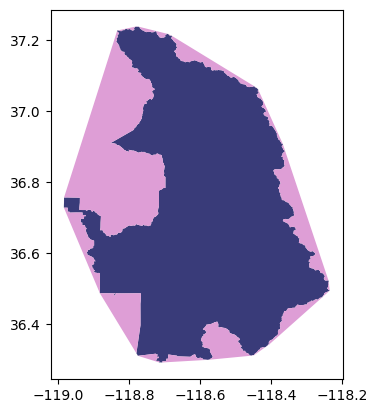

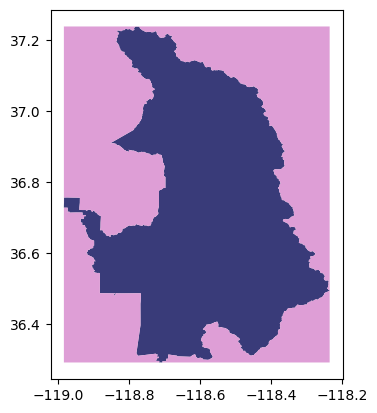

In [42]:
seki_as_one.overlay(seki_convex_hull, how='union').plot(cmap='tab20b')
seki_as_one.overlay(shape_processor.get_box(seki_as_one), how='union').plot(cmap='tab20b')

print(f'Area of convex_hull to original shape: {float(seki_convex_hull.geometry.area / seki_as_one.geometry.area)}')
print(f'Area of box to original shape: {float(shape_processor.get_box(seki_as_one).geometry.area / seki_as_one.geometry.area)}')

Area of convex_hull to original shape: 1.4030614273601987
Area of box to original shape: 2.9122388199076594


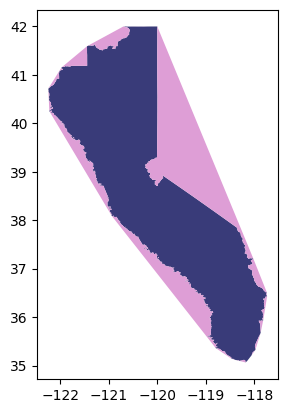

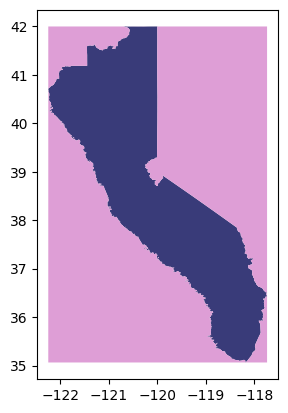

In [43]:
sierras_as_one.overlay(sierras_convex_hull, how='union').plot(cmap='tab20b')
sierras_as_one.overlay(shape_processor.get_box(sierras_as_one), how='union').plot(cmap='tab20b')

print(f'Area of convex_hull to original shape: {float(sierras_convex_hull.geometry.area / sierras_as_one.geometry.area)}')
print(f'Area of box to original shape: {float(shape_processor.get_box(sierras_as_one).geometry.area / sierras_as_one.geometry.area)}')